In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps

In [2]:
#Importamos el archivo csv y elegimos la columna index que sera 'Name'
df=pd.read_csv('Pokemon.csv')

*Organizando Dataframe*

In [3]:
#Eliminamos la columna #
df=df.drop('#',axis=1)

In [4]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
#Obersavmos que en la columna 'Type2' hay datos con valor NaN entonces vamos a repetir la columna TYPE 1 al TYPE 2

condicion = df['Type 2'].isna()
df.loc[condicion, 'Type 2'] = df.loc[condicion, 'Type 1']

*LIMPIEZA DEL DATAFRAME*
#para evitar futuros conflictos resolveremos los siguientes casos:
-verificaremos el tipo de dato de cada columna
-Todo estara en mayuscula para evitar errores de digitación
-Eliminaremos espacios al principio y finally


In [6]:
# TODO ESTA EN ORDEN
df = df.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    object
 4   HP          800 non-null    object
 5   Attack      800 non-null    object
 6   Defense     800 non-null    object
 7   Sp. Atk     800 non-null    object
 8   Sp. Def     800 non-null    object
 9   Speed       800 non-null    object
 10  Generation  800 non-null    object
 11  Legendary   800 non-null    object
dtypes: object(12)
memory usage: 75.1+ KB


In [7]:
df = df.map(lambda x: x.upper() )


In [8]:
df=df.map(lambda x:x.strip() )

In [9]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,BULBASAUR,GRASS,POISON,318,45,49,49,65,65,45,1,FALSE
1,IVYSAUR,GRASS,POISON,405,60,62,63,80,80,60,1,FALSE
2,VENUSAUR,GRASS,POISON,525,80,82,83,100,100,80,1,FALSE
3,VENUSAURMEGA VENUSAUR,GRASS,POISON,625,80,100,123,122,120,80,1,FALSE
4,CHARMANDER,FIRE,FIRE,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...
795,DIANCIE,ROCK,FAIRY,600,50,100,150,100,150,50,6,TRUE
796,DIANCIEMEGA DIANCIE,ROCK,FAIRY,700,50,160,110,160,110,110,6,TRUE
797,HOOPAHOOPA CONFINED,PSYCHIC,GHOST,600,80,110,60,150,130,70,6,TRUE
798,HOOPAHOOPA UNBOUND,PSYCHIC,DARK,680,80,160,60,170,130,80,6,TRUE


In [10]:
#convertimos los valores a numericos de nuevo
df['Total']=df['Total'].astype(int)
df['HP']=df['HP'].astype(int)
df['Attack']=df['Attack'].astype(int)
df['Defense']= df['Defense'].astype(int)
df['Sp. Atk']=df['Sp. Atk'].astype(int)
df['Sp. Def']=df['Sp. Def'].astype(int)
df['Speed']=df['Speed'].astype(int)
df['Generation']=df['Generation'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int32 
 4   HP          800 non-null    int32 
 5   Attack      800 non-null    int32 
 6   Defense     800 non-null    int32 
 7   Sp. Atk     800 non-null    int32 
 8   Sp. Def     800 non-null    int32 
 9   Speed       800 non-null    int32 
 10  Generation  800 non-null    int32 
 11  Legendary   800 non-null    object
dtypes: int32(8), object(4)
memory usage: 50.1+ KB


In [11]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,BULBASAUR,GRASS,POISON,318,45,49,49,65,65,45,1,FALSE
1,IVYSAUR,GRASS,POISON,405,60,62,63,80,80,60,1,FALSE
2,VENUSAUR,GRASS,POISON,525,80,82,83,100,100,80,1,FALSE
3,VENUSAURMEGA VENUSAUR,GRASS,POISON,625,80,100,123,122,120,80,1,FALSE
4,CHARMANDER,FIRE,FIRE,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...
795,DIANCIE,ROCK,FAIRY,600,50,100,150,100,150,50,6,TRUE
796,DIANCIEMEGA DIANCIE,ROCK,FAIRY,700,50,160,110,160,110,110,6,TRUE
797,HOOPAHOOPA CONFINED,PSYCHIC,GHOST,600,80,110,60,150,130,70,6,TRUE
798,HOOPAHOOPA UNBOUND,PSYCHIC,DARK,680,80,160,60,170,130,80,6,TRUE


# GRAFICOS 

# PORCENTAJE DE CANTIDAD DE TIPOS DE POKEMONS

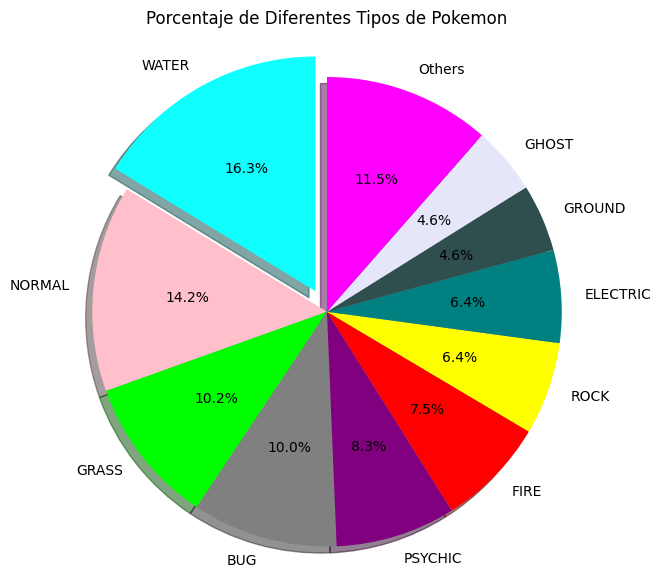

In [25]:
cantidadQuery='SELECT  COUNT ("Type 1") as Cantidad,"Type 1"  FROM df  group by "Type 1" ORDER BY Cantidad DESC '
cantidadTipos=ps.sqldf(cantidadQuery)
colores = ['#0fffff', '#FFC0CB', '#00ff00', '#808080', '#800080', '#FF0000', '#FFFF00', '#008080', '#2F4F4F','#E6E6FA','#FF00FF']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0,0,0) 
sizes = cantidadTipos["Cantidad"].head(10).tolist() + [79]
labels = cantidadTipos["Type 1"].head(10).tolist() + ["Others"]
plt.pie(sizes, explode=explode, labels=labels, colors=colores,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Porcentaje de Diferentes Tipos de Pokemon") #Titulo del gráfico
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()#Muestra el gráfico


# GRAFICA DE COMPARACIÓN ENTRE TIPOS FUEGO Y AGUA

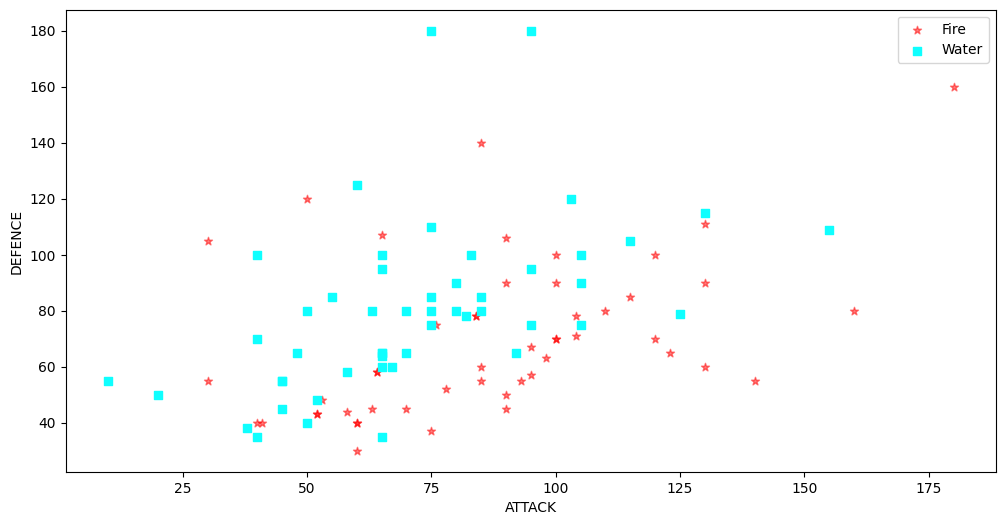

In [26]:
QueryFire='SELECT "Name","Type 1","Type 2","Attack" ,"Defense" FROM df WHERE "Type 1" = \'FIRE\' OR"Type 2" = \'FIRE\''
QueryWater='SELECT "Name","Type 1","Type 2","Attack" ,"Defense" FROM df WHERE "Type 1" = \'WATER\' OR "Type 2" = \'WATER\''
FIREVS=ps.sqldf(QueryFire)
WATERVS=ps.sqldf(QueryWater)
#LLAMANDO A SCATTER PARA EL VERSUS
plt.scatter(FIREVS['Attack'].head(50),FIREVS['Defense'].head(50),color='#FF0000',label='Fire',alpha=0.5,marker='*') 
plt.scatter(WATERVS['Attack'].head(50),WATERVS['Defense'].head(50),color='#0fffff',label="Water",marker='s')
plt.xlabel("ATTACK")
plt.ylabel("DEFENCE")
plt.legend()
plt.plot()
fig=plt.gcf()  #obtenemos la figura usando.gcf()
fig.set_size_inches(12,6) #establecer el tamaño de la figura en 12 pulgadas de ancho y 6 pulgadas de altura.
plt.show()

# TOP POKEMONS MAS FUERTES 

In [27]:
sql_query ='SELECT "Name", "Type 1", "Total" FROM df WHERE ("Total", "Type 1") IN (SELECT MAX("Total"), "Type 1" FROM df  WHERE "Legendary"="FALSE" AND LOWER("Name") NOT LIKE "%MEGA%"  GROUP BY "Type 1") AND LOWER("Name") NOT LIKE "%mega%" AND "Legendary"="FALSE" ORDER BY "Type 1","Total" DESC,"Name"'
TopFuertes=ps.sqldf(sql_query)
plt.bar

,Name,Type 1,Total
0,GENESECT,BUG,600
1,HYDREIGON,DARK,600
2,DRAGONITE,DRAGON,600
3,GARCHOMP,DRAGON,600
4,GOODRA,DRAGON,600
5,SALAMENCE,DRAGON,600
6,ELECTIVIRE,ELECTRIC,540
7,FLORGES,FAIRY,552
8,LUCARIO,FIGHTING,525
9,ARCANINE,FIRE,555
